In [36]:
import numpy as np
import pandas as pd
import BNewmark_DS_GR2_2023_02 as BN
import matplotlib.pyplot as plt

EspectrosdeRespuesta. 
Los espectros de respuesta de aceleración, velocidad o desplazamiento, se emplean de acuerdo al tipo de análisis estructural que se realiza y a la filosofía de diseño que se emplee.

<img src='./images/spectro_resp.png'>

<function matplotlib.pyplot.show(close=None, block=None)>

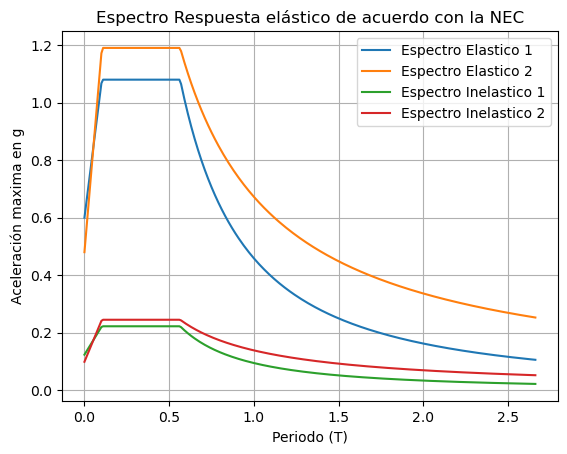

In [37]:
'''
Para diseño basado en fuerzas DBF.
'''

n = [1.8, 2.48]
z = [0.5, 0.4]      #Para un TR475 años
I = [1, 1]
fa = [1.2, 1.2]
fd = [1.11, 1.11]
fs = [1.11, 1.11]
r = [1.5, 1]
R = [6, 6]
fip = 0.9   #Coeficiente de castigo por irregularidad en planta.
fie = 0.9   #Coeficiente de castigo por irregularidad en elevacion.
g = 9.81
fip_ASCE = 1
fie_ASCE = 1

Tl = 2.4*fd[0]
dt = Tl/0.01

Specarr = np.zeros((int(dt)+1,2))
SpecIarr = np.zeros((int(dt)+1,2))
Tmparr = np.zeros((int(dt)+1,2))

for i in range(2):
    Spec, Tmp = BN.Spec_NEC(n[i], z[i], fa[i], fd[i], fs[i], r[i], I[i], R[i])
    Specarr[:,i] = Spec
    SpecIarr[:,i] = [val/(R[i]*fip*fie) for val in Specarr[:,i]]
    Tmparr[:,i] = Tmp

plt.plot(Tmparr[:,0], Specarr[:,0], label='Espectro Elastico 1')
plt.plot(Tmparr[:,1], Specarr[:,1], label='Espectro Elastico 2')
plt.plot(Tmparr[:,0], SpecIarr[:,0],  label='Espectro Inelastico 1')
plt.plot(Tmparr[:,1], SpecIarr[:,1], label='Espectro Inelastico 2')
plt.title('Espectro Respuesta elástico de acuerdo con la NEC')
plt.xlabel('Periodo (T)')
plt.ylabel('Aceleración maxima en g')
plt.legend()
plt.grid(True)
plt.show


In [38]:
#Guardando Los Datos del Primer espectro en un archivo .xlsx

Espectro_resp = np.concatenate((np.array(Tmparr)[:, [0]], np.array(Specarr)[:, [0]]), axis=1)
tbl_Specarr = pd.DataFrame(Espectro_resp)
Specarr_path = './EspectrosNEC_guardados/Espectro1.csv'
tbl_Specarr.to_csv(Specarr_path, index=False)
print(f'Data has been saved to {Specarr_path}')

Data has been saved to ./EspectrosNEC_guardados/Espectro1.csv


<img src='./images/dt_web_Berkley.PNG' height='500px' width='700px'>

In [39]:
import csv
from openpyxl import Workbook

# Read the CSV file
csv_file = './EspectrosNEC_guardados/searchResults.csv'  # Replace with the path to your CSV file

# Create a new Workbook (XLSX file)
wb = Workbook()

# Create a new sheet in the Workbook
sheet = wb.active

# Open the CSV file and write its content to the XLSX sheet
with open(csv_file, 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        sheet.append(row)

# Specify the output XLSX file name
xlsx_file = './EspectrosNEC_guardados/searchResults.xlsx'  # Replace with the desired XLSX file name

# Save the Workbook to an XLSX file
wb.save(xlsx_file)
print('Conversion conseguida')

Conversion conseguida


In [40]:
xlsx_file = './EspectrosNEC_guardados/searchResults.xlsx'
tbl_Respuestas_Berkley = pd.read_excel(xlsx_file)
display(tbl_Respuestas_Berkley)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,PEER Ground Motion Database,Time Series Search Report -- NGA-West2 -- 202...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-- Summary of PEER Ground Motion Database Sea...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Magnitude Min:,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,12.0,0.00264588,0.00107191,0.000654,0.00020923,0.00072915,0.000452,0.00476278,0.00438018,0.00368,...,0.000402,0.00058611,0.00014233,4.96e-05,0.0018642,0.0009897,0.00093,0.00151294,0.00140314,0.000737
276,13.0,0.00216246,0.00089403,0.000541,0.00018067,0.00062909,0.00036,0.00409787,0.00368112,0.00284,...,0.000343,0.00049014,0.00012252,4.22e-05,0.00159722,0.00082623,0.000789,0.00128684,0.00116245,0.000613
277,14.0,0.00179903,0.00075581,0.00045,0.00016041,0.00054551,0.000298,0.00353397,0.00313618,0.00221,...,0.000296,0.00041579,0.00010623,3.65e-05,0.00138325,0.00069911,0.000677,0.00110737,0.00097587,0.000517
278,15.0,0.00152114,0.00064694,0.000377,0.00014414,0.00047392,0.000255,0.00306172,0.00270363,0.00173,...,0.000258,0.0003571,9.276e-05,3.2e-05,0.00120926,0.00059865,0.000587,0.00096273,0.00082914,0.000442


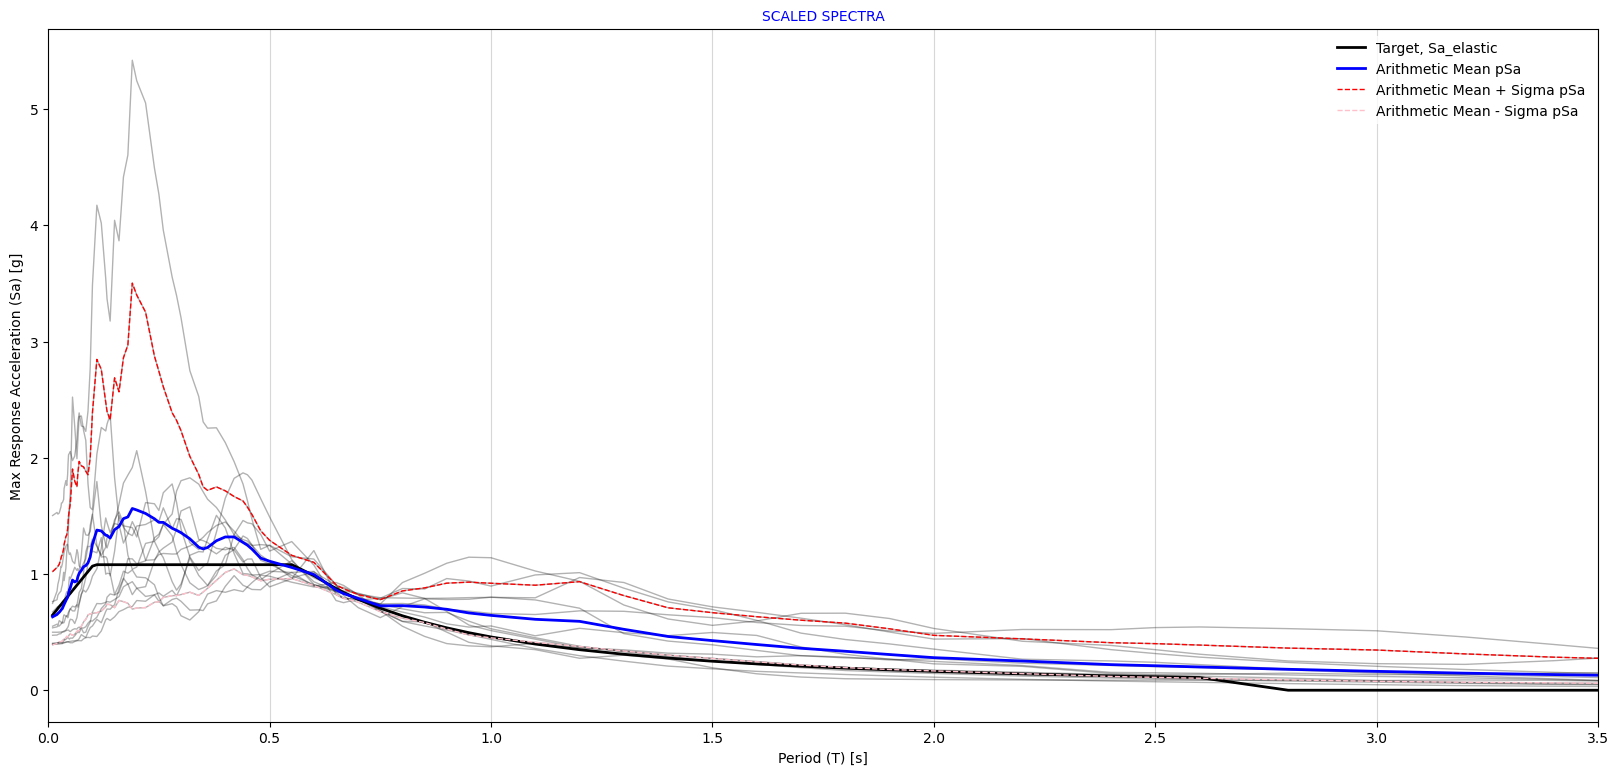

In [70]:
Datos_curvas = tbl_Respuestas_Berkley.iloc[55:166, 0:16]
Datos_curvas_Espectros = Datos_curvas.to_numpy
Espectro_respuestas_Berkley = Datos_curvas_Espectros()
Espectro_respuestas_Berkley = Espectro_respuestas_Berkley.astype(float)
tbl_Espectros = pd.DataFrame(Espectro_respuestas_Berkley)

T = Espectro_respuestas_Berkley[:, 0]
Specs = Espectro_respuestas_Berkley[:, 1:]

fig, ax = plt.subplots(figsize=(20, 9)) 

ax.plot(T, Specs, color='black', marker='+', markersize=0, markerfacecolor='w', markeredgewidth=0, linewidth=1.0, alpha=0.3,linestyle = '-')
ax.plot(T, Specs[:,0], color='black', marker='+', markersize=0, markerfacecolor='w', markeredgewidth=0, linewidth=2.0, alpha=1,linestyle = '-',label= f'Target, Sa_elastic')
ax.plot(T, Specs[:,1], color='blue', marker='+', markersize=0, markerfacecolor='w', markeredgewidth=0, linewidth=2.0, alpha=1,linestyle = '-',label= f'Arithmetic Mean pSa')
ax.plot(T, Specs[:,2], color='red', marker='+', markersize=0, markerfacecolor='w', markeredgewidth=0, linewidth=1.0, alpha=1,linestyle = '--',label= f'Arithmetic Mean + Sigma pSa')
ax.plot(T, Specs[:,3], color='pink', marker='+', markersize=0, markerfacecolor='w', markeredgewidth=0, linewidth=1.0, alpha=1,linestyle = '--',label= f'Arithmetic Mean - Sigma pSa')

# Customize the plot as needed
ax.set_xlim(0, 3.5)
ax.set_xlabel('X-axis label')
ax.set_ylabel('Y-axis label')
ax.set_title('Plots of Data Columns')

plt.title('SCALED SPECTRA', fontsize=10, color=(0, 0, 1))                                                    
plt.xlabel('Period (T) [s]', rotation=0, fontsize=10, color=(0, 0, 0))                                       
plt.ylabel('Max Response Acceleration (Sa) [g]', rotation=90, fontsize=10, color=(0, 0, 0))                     
legend = plt.legend(fontsize=10)                                                                                
legend.get_frame().set_edgecolor('none')                                                                        
ax.grid(which='both', axis='x', alpha=0.5) 
plt.show()